## Simple ANN Model with 97% Accuracy for Digit Recognition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils import np_utils
from keras.layers.core import Dense, Activation, Dropout
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


In [6]:
# Read data
train = pd.read_csv('train.csv')
labels = train.ix[:,0].values.astype('int32')
X_train = (train.ix[:,1:].values).astype('float32')
X_test = (pd.read_csv('test.csv').values).astype('float32')
# convert list of labels to binary class matrix
y_train = np_utils.to_categorical(labels) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


# Visualizing the Number and Respective Label

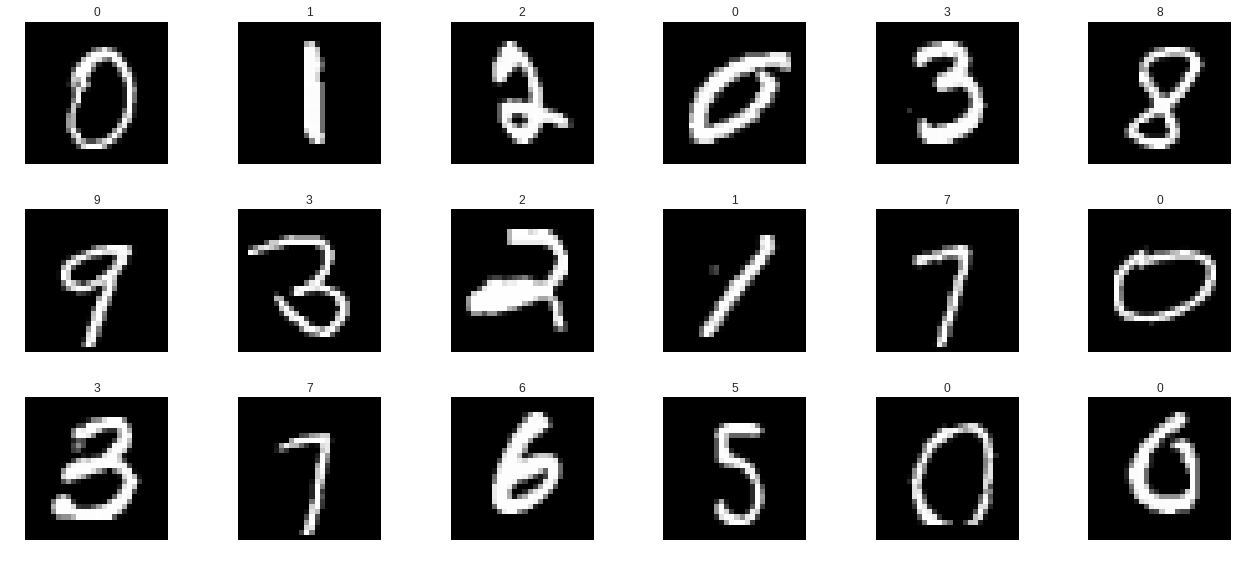

In [22]:
def show_image(train, labels, index):
    image_shaped = train.values.reshape(28,28)
    plt.subplot(3, 6, index+1)
    plt.imshow(image_shaped, cmap=plt.cm.gray)
    plt.title(labels)
    plt.axis('off')


plt.figure(figsize=(18, 8))
sample_image = train.sample(18).reset_index(drop=True)
for index, row in sample_image.iterrows():
    label = row['label']
    image_pixels = row.drop('label')
    show_image(image_pixels, label, index)
plt.tight_layout()

In [0]:
# pre-processing: divide by max and substract mean
scale = np.max(X_train)
X_train /= scale
X_test /= scale

mean = np.std(X_train)
X_train -= mean
X_test -= mean

input_dim = X_train.shape[1]
nb_classes = y_train.shape[1]

## Built model Using Keras 

In [8]:

model = Sequential()
model.add(Dense(128, input_dim=input_dim))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# we'll use categorical xent for the loss, and RMSprop as the optimizer
model.compile(loss='categorical_crossentropy', optimizer='rmsprop')


model.fit(X_train, y_train, nb_epoch=100, batch_size=16, validation_split=0.1, verbose=2)


preds = model.predict_classes(X_test, verbose=0)

def write_preds(preds, fname):
    pd.DataFrame({"ImageId": list(range(1,len(preds)+1)), "Label": preds}).to_csv(fname, index=False, header=True)

write_preds(preds, "keras-mlp.csv")

## Visualizing the predicted Number with its Digit 

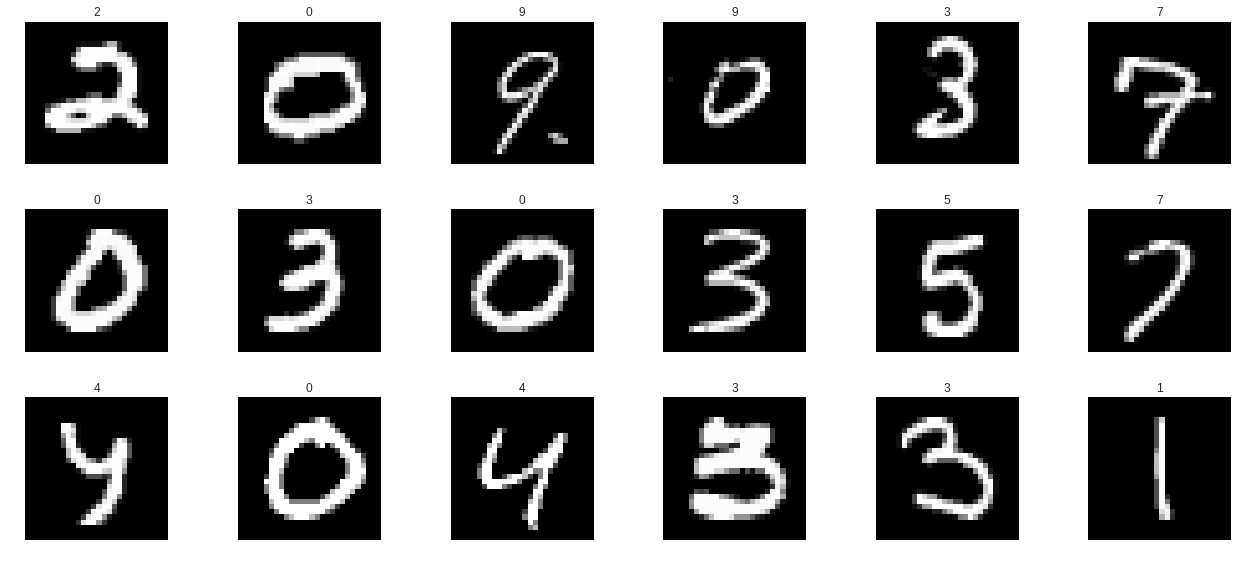

In [23]:
X_test = pd.read_csv('test.csv')
plt.figure(figsize=(18, 8))
sample_image = X_test.head(18)
for index, row in sample_image.iterrows():
    label = preds[index]
    image_pixels = row
    show_image(image_pixels, label, index)
plt.tight_layout()


## As we can see from above majority of the Digits are predicted accuratly 